<a id="1"></a>
<h1 style="background-color: #e94560; font-size: 20px; color: #ffffff; text-align: center; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-weight: bold; margin: 10px; border: 1px solid; border-color: #e94560; border-radius: 1px; padding: 15px; border-radius: 8px 8px 0 0;">PACE stages</h1>


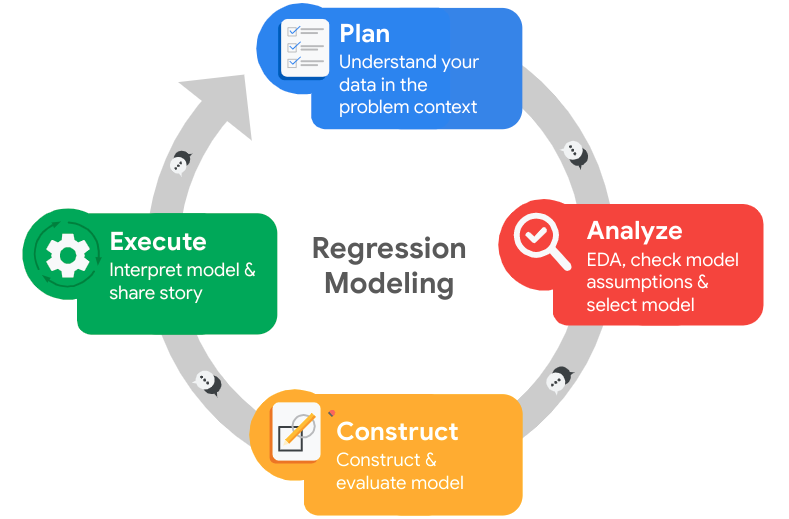

<a id="2"></a>
<h2 style="background-color: #3498db; font-size: 20px; color: #ffffff; text-align: center; font-family: 'Indie Flower', cursive; font-weight: bold; margin: 10px; border: 2px solid #ff6b6b; border-radius: 12px; padding: 15px;">Stage 1: Plan</h2>

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:


### import Packages

- Import packages
- Load dataset

#### Import packages

In [1]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Miscellaneous
from ydata_profiling import ProfileReport

# Import packages for machine learning
from pycaret.anomaly import AnomalyExperiment
from pycaret.classification import *
import pycaret

# Set pandas to display all columns
pd.set_option('display.max_columns', None)


#### Load dataset

In [2]:
# Load dataset into a datafram
df_sample0 = pd.read_csv('sample_submission.csv')
df_test0 = pd.read_csv('test.csv')
df_train0 = pd.read_csv('train.csv')

df_sample = df_sample0.copy()
df_test = df_test0.copy()
df_train = df_train0.copy()

### Data Exploration (Initial EDA and Data Cleaning)

* Understand your variables
* Clean your dataset (missing data, redundant data, outliers)

#### Gather basic information about the data

**df_test**

In [3]:
# basic information about the data
print(df_test.info())

# Display first few rows of the dataframe
df_test.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   id                               745305 non-null  int64
 1   MonsoonIntensity                 745305 non-null  int64
 2   TopographyDrainage               745305 non-null  int64
 3   RiverManagement                  745305 non-null  int64
 4   Deforestation                    745305 non-null  int64
 5   Urbanization                     745305 non-null  int64
 6   ClimateChange                    745305 non-null  int64
 7   DamsQuality                      745305 non-null  int64
 8   Siltation                        745305 non-null  int64
 9   AgriculturalPractices            745305 non-null  int64
 10  Encroachments                    745305 non-null  int64
 11  IneffectiveDisasterPreparedness  745305 non-null  int64
 12  DrainageSystems               

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3


**df_train**

In [4]:
# basic information about the data
print(df_train.info())

# Display first few rows of the dataframe
df_train.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450


#### Gather descriptive statistics about the data

In [5]:
# descriptive statistics about the data
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1117957.0,558978.000000,322726.531784,0.000,279489.00,558978.000,838467.00,1117956.000
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000


<a id="2"></a>
<h2 style="background-color: #3498db; font-size: 20px; color: #ffffff; text-align: center; font-family: 'Indie Flower', cursive; font-weight: bold; margin: 10px; border: 2px solid #2980b9; border-radius: 12px; padding: 15px;">Step 2: Analyze </h2>

* Data Exploration (Initial EDA and data cleaning)
* Understand your variables
* Clean your dataset (missing data, redundant data ...)


#### Check missing values

In [6]:
# Check for missing values
print("numbers of missing values in df_train : ",df_train.isna().sum().sum())
print("numbers of missing values in df_test : ",df_test.isna().sum().sum())

numbers of missing values in df_train :  0
numbers of missing values in df_test :  0


#### Check duplicates

In [7]:
# Check for duplicates
print("numbers of duplicate in df_train : ",df_train.duplicated().sum())
print("numbers of duplicate in df_test : ",df_test.duplicated().sum())

numbers of duplicate in df_train :  0
numbers of duplicate in df_test :  0


**Delete the id column**

In [8]:
#drop the id column
df_train = df_train.drop(columns='id',axis=1)

In [9]:
df_train.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415


### Outliers Detection

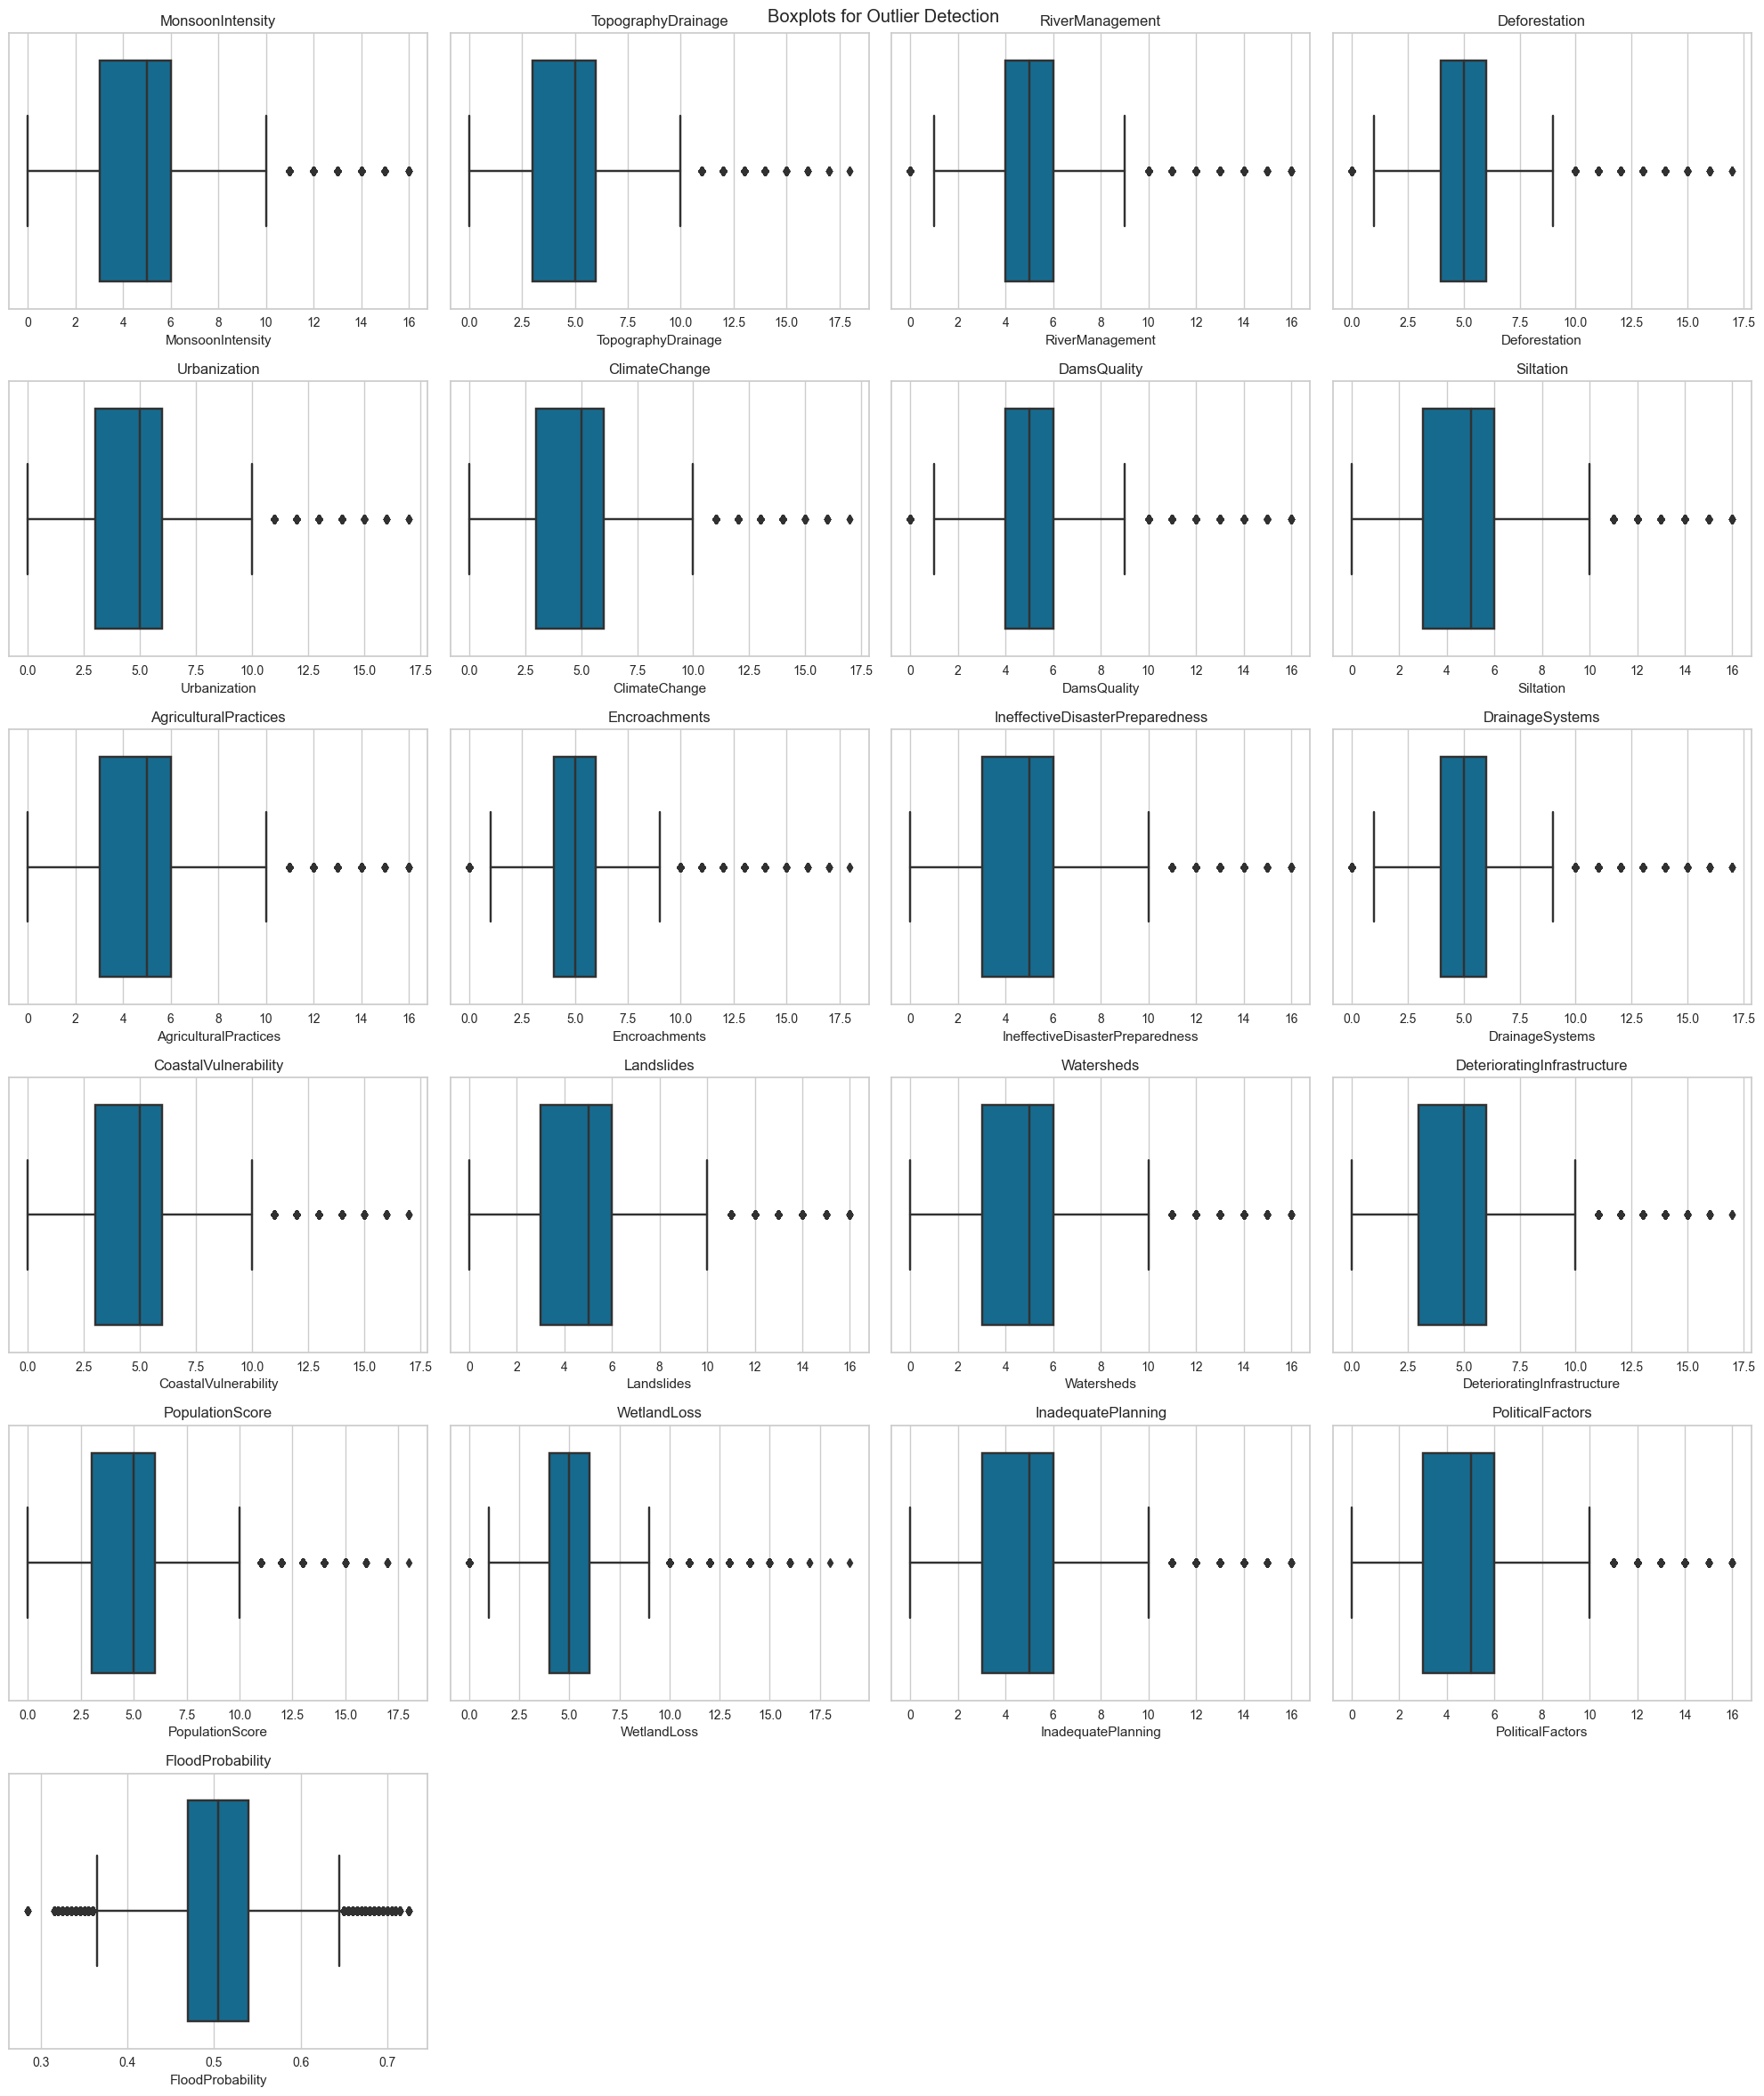

In [10]:
# Determine the number of rows and columns for the subplots
n = len(df_train.columns)
ncols = 4  # number of columns for subplots
nrows = n // ncols if n % ncols == 0 else n // ncols + 1  # calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 4 * nrows))
fig.suptitle('Boxplots for Outlier Detection')

# Flatten the axes array and remove extra subplots
axes = axes.flatten()
for ax in axes[n:]:
    ax.remove()

# Create box plots for each column
for i, col in enumerate(df_train.columns):
    sns.boxplot(ax=axes[i], x=df_train[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


### EDA using ProfileReport

In [11]:
# ProfileReport(df_train)

### Correlation Between Columns And Heat map

#### Pearson Correlation

In [12]:
df_train.corr(method='pearson')

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
MonsoonIntensity,1.000000,-0.007362,-0.008070,-0.007251,-0.009309,-0.008031,-0.007787,-0.007836,-0.008232,-0.010309,-0.008032,-0.009716,-0.010659,-0.009121,-0.008900,-0.008486,-0.008679,-0.006811,-0.008155,-0.008474,0.189098
TopographyDrainage,-0.007362,1.000000,-0.009924,-0.008548,-0.010532,-0.009619,-0.007607,-0.009824,-0.009496,-0.012887,-0.010746,-0.010056,-0.012526,-0.010240,-0.011067,-0.006628,-0.010815,-0.010267,-0.011617,-0.012350,0.187635
RiverManagement,-0.008070,-0.009924,1.000000,-0.008574,-0.012292,-0.009237,-0.008711,-0.010058,-0.010783,-0.011615,-0.010675,-0.011277,-0.011680,-0.008994,-0.011412,-0.005827,-0.006727,-0.010069,-0.009673,-0.011550,0.187131
Deforestation,-0.007251,-0.008548,-0.008574,1.000000,-0.012248,-0.008266,-0.009356,-0.011536,-0.010039,-0.013175,-0.009512,-0.010490,-0.012388,-0.009257,-0.010671,-0.008862,-0.011777,-0.011004,-0.010424,-0.009661,0.184001
Urbanization,-0.009309,-0.010532,-0.012292,-0.012248,1.000000,-0.011199,-0.011128,-0.010153,-0.010559,-0.010784,-0.012685,-0.012572,-0.014497,-0.010582,-0.012107,-0.010656,-0.011485,-0.011023,-0.011584,-0.013005,0.180861
ClimateChange,-0.008031,-0.009619,-0.009237,-0.008266,-0.011199,1.000000,-0.008427,-0.009457,-0.011517,-0.012533,-0.011346,-0.009650,-0.013005,-0.009352,-0.009882,-0.006324,-0.010332,-0.009376,-0.010772,-0.011379,0.184761
DamsQuality,-0.007787,-0.007607,-0.008711,-0.009356,-0.011128,-0.008427,1.000000,-0.009401,-0.009033,-0.010890,-0.009515,-0.010439,-0.012096,-0.009924,-0.009085,-0.009831,-0.009599,-0.009372,-0.011374,-0.013081,0.187996
Siltation,-0.007836,-0.009824,-0.010058,-0.011536,-0.010153,-0.009457,-0.009401,1.000000,-0.010179,-0.010628,-0.009099,-0.010702,-0.011762,-0.009173,-0.009457,-0.006312,-0.008739,-0.008667,-0.009079,-0.008493,0.186789
AgriculturalPractices,-0.008232,-0.009496,-0.010783,-0.010039,-0.010559,-0.011517,-0.009033,-0.010179,1.000000,-0.012244,-0.010763,-0.010845,-0.011415,-0.010624,-0.009901,-0.008708,-0.008958,-0.011392,-0.010418,-0.011157,0.183366
Encroachments,-0.010309,-0.012887,-0.011615,-0.013175,-0.010784,-0.012533,-0.010890,-0.010628,-0.012244,1.000000,-0.012211,-0.011994,-0.016203,-0.011299,-0.013542,-0.010404,-0.010645,-0.010364,-0.012175,-0.011860,0.178841


#### Heat Map

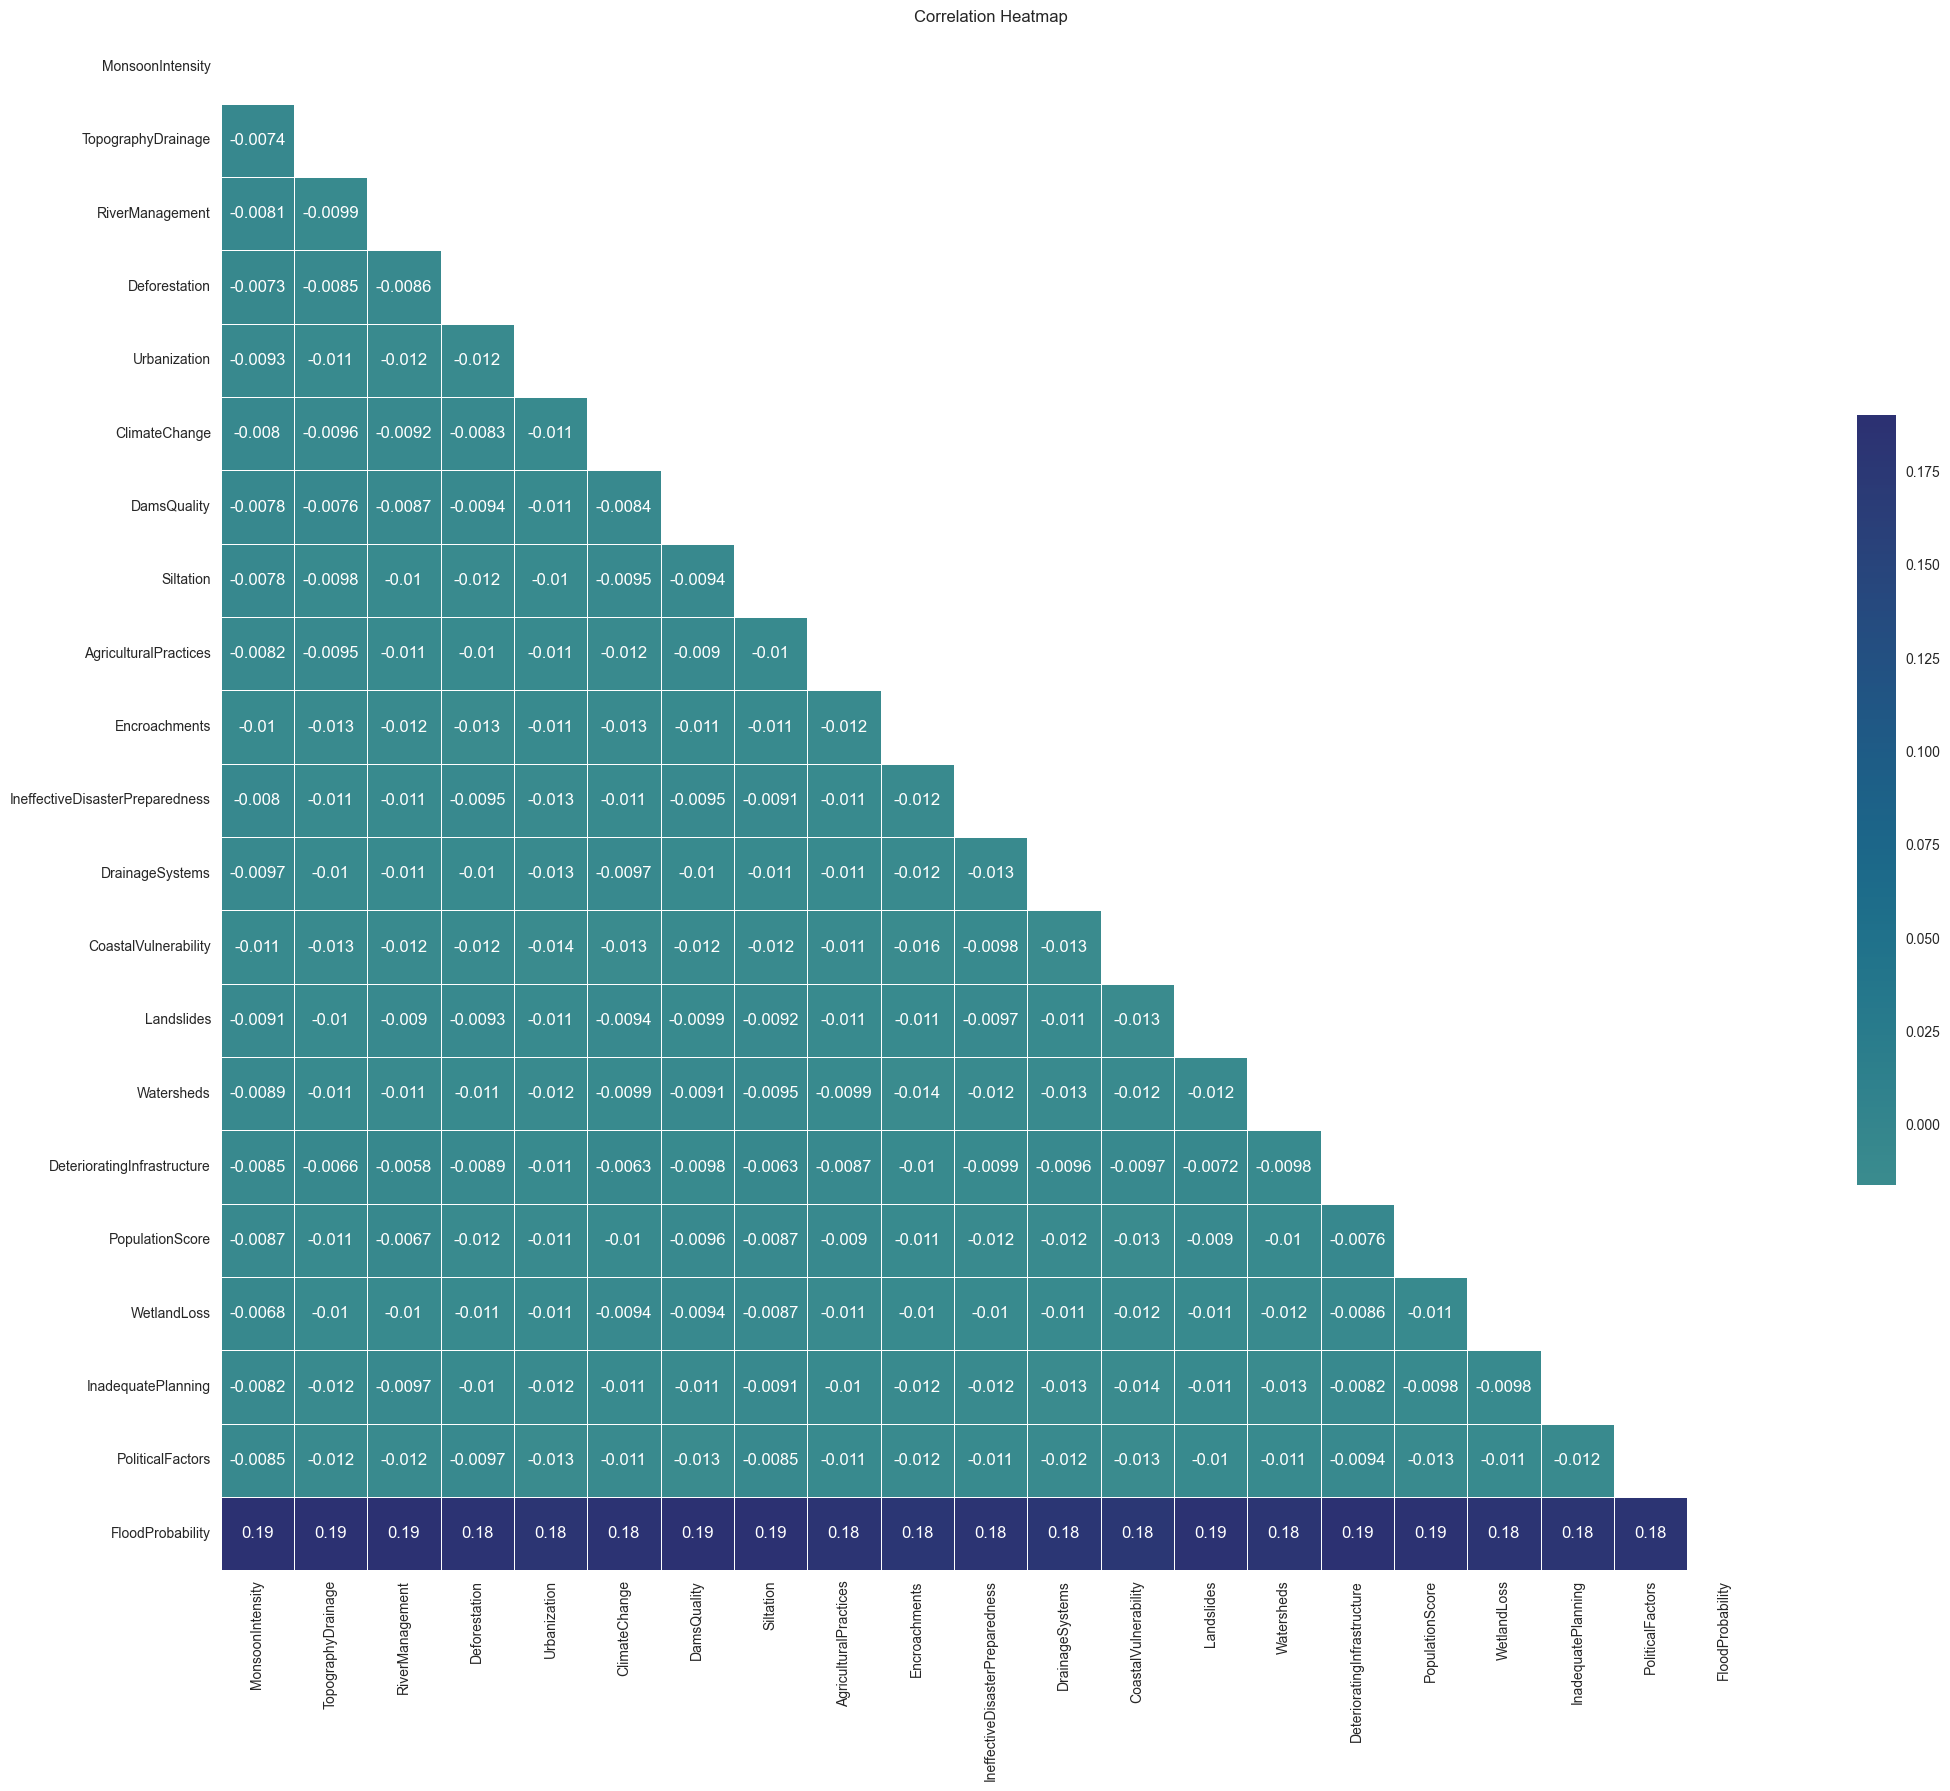

In [13]:
# Create a figure
plt.figure(figsize=(25, 20))

# Compute the correlation matrix for all the numeric columns in the dataframe
correlation_matrix = df_train.select_dtypes(include=['float64', 'int64']).corr(method='pearson')

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap with annotations, using the 'crest' colormap
sns.heatmap(correlation_matrix, annot=True, cmap='crest', mask=mask, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap')
# Display the plot
plt.show()

<a id="2"></a>
<h2 style="background-color: #f7ab00; font-size: 20px; color: #ffffff; text-align: center; font-family: 'Indie Flower', cursive; font-weight: bold; margin: 10px; border: 2px solid #ff6b6b; border-radius: 12px; padding: 15px;">Stage 3: Construct</h2>

### Pycaret

#### Without Tune The Models

**create a smaller sample**

Public Score : 
- using 10% of the data : 0.84457
- using 100% of the data : 0.84458

In [14]:
# Let's say you want to sample 10% of your data
# df_train = df_train.sample(frac=0.1)

In [15]:
from pycaret.regression import *
s = setup(df_train, target = 'FloodProbability', session_id = 42)

,Description,Value
0,Session id,42
1,Target,FloodProbability
2,Target type,Regression
3,Original data shape,"(1117957, 21)"
4,Transformed data shape,"(1117957, 21)"
5,Transformed train set shape,"(782569, 21)"
6,Transformed test set shape,"(335388, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


#### Compare Models

In [16]:
# functional API
best = compare_models(sort='R2',include= ['lr','ridge','lar','br',
                                          'huber','xgboost','lightgbm','catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0158,0.0004,0.0200,0.8461,0.0134,0.0319,47.3910
lr,Linear Regression,0.0158,0.0004,0.0201,0.8449,0.0135,0.0319,1.3890
ridge,Ridge Regression,0.0158,0.0004,0.0201,0.8449,0.0135,0.0319,0.2860
lar,Least Angle Regression,0.0158,0.0004,0.0201,0.8449,0.0135,0.0319,0.2910
br,Bayesian Ridge,0.0158,0.0004,0.0201,0.8449,0.0135,0.0319,0.8950
huber,Huber Regressor,0.0155,0.0004,0.0203,0.8412,0.0136,0.0311,4.8580
xgboost,Extreme Gradient Boosting,0.0176,0.0005,0.0223,0.8086,0.0149,0.0356,3.5970
lightgbm,Light Gradient Boosting Machine,0.0202,0.0006,0.0247,0.7663,0.0165,0.0408,4.4190


In [17]:
# save the models on df
no_tuning_models = pull()

In [18]:
print(best)

**best performing model based on the metric**

In [19]:
# help(compare_models)

In [20]:
best_r2_models_top3 = compare_models(sort = 'R2', n_select = 3,include= ['lr','ridge','lar','br',
                                          'huber','xgboost','lightgbm','catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0158,0.0004,0.0200,0.8461,0.0134,0.0319,47.1730
lr,Linear Regression,0.0158,0.0004,0.0201,0.8449,0.0135,0.0319,0.7760
ridge,Ridge Regression,0.0158,0.0004,0.0201,0.8449,0.0135,0.0319,0.2890
lar,Least Angle Regression,0.0158,0.0004,0.0201,0.8449,0.0135,0.0319,0.2820
br,Bayesian Ridge,0.0158,0.0004,0.0201,0.8449,0.0135,0.0319,0.8740
huber,Huber Regressor,0.0155,0.0004,0.0203,0.8412,0.0136,0.0311,4.8150
xgboost,Extreme Gradient Boosting,0.0176,0.0005,0.0223,0.8086,0.0149,0.0356,3.5840
lightgbm,Light Gradient Boosting Machine,0.0202,0.0006,0.0247,0.7663,0.0165,0.0408,4.3140


#### Analyze Model

In [21]:
# functional API
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

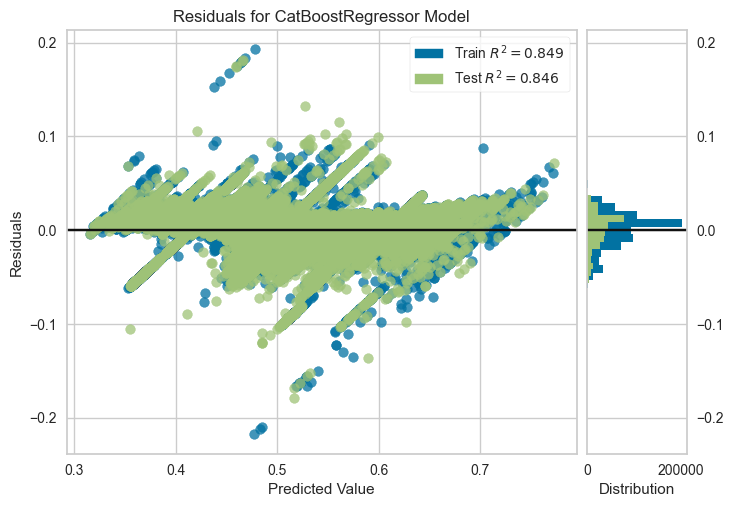

In [22]:
# functional API
plot_model(best, plot = 'residuals')

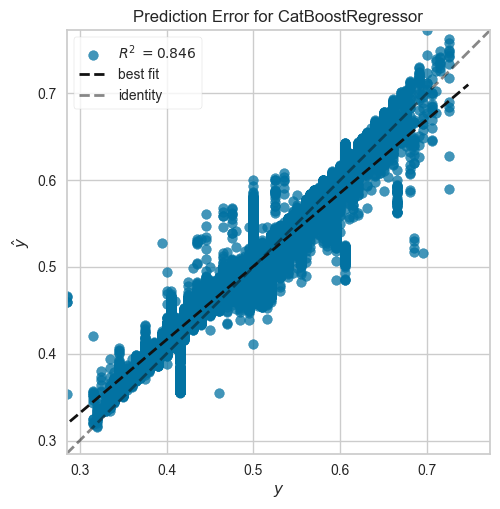

In [23]:
# plot error
plot_model(best, plot = 'error')

#### Feature Importance

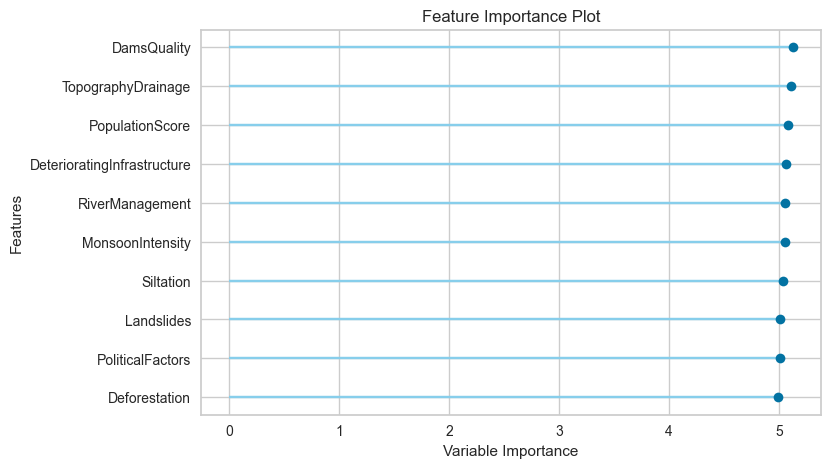

In [24]:

# functional API
plot_model(best, plot = 'feature')

#### Predictions

In [25]:
# functional API
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.0158,0.0004,0.0200,0.8464,0.0134,0.0319


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability,prediction_label
1105809,7,5,8,4,8,4,8,4,3,7,...,7,4,7,2,3,6,7,2,0.560,0.534164
442591,5,3,10,9,9,6,4,2,4,9,...,6,7,7,6,4,2,9,6,0.575,0.588533
5434,5,6,2,6,3,4,4,4,4,1,...,7,6,5,6,7,7,6,5,0.510,0.521288
82966,7,3,6,4,4,5,8,5,6,5,...,5,3,8,7,4,6,5,4,0.530,0.539588
584893,6,5,7,7,5,5,5,6,3,7,...,4,6,9,5,6,4,5,8,0.590,0.582405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441725,6,4,7,5,6,2,6,11,3,7,...,5,7,5,5,2,4,1,2,0.505,0.514717
277125,4,3,3,3,5,5,9,5,4,5,...,6,6,5,6,4,6,7,4,0.475,0.499816
365176,3,5,3,3,5,5,5,9,10,5,...,4,4,5,4,6,1,3,4,0.490,0.488996
750812,4,3,6,6,6,5,4,3,5,2,...,5,3,4,8,4,8,4,6,0.490,0.499203


**Prediction on the test**

In [26]:
# functional API
predictions = predict_model(best, data=df_test)
predictions.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,prediction_label
0,1117957,4,6,3,5,6,7,8,7,8,...,5,7,5,6,3,6,4,4,5,0.574378
1,1117958,4,4,2,9,5,5,4,7,5,...,4,7,4,5,1,7,4,4,3,0.455448
2,1117959,1,3,6,5,7,2,4,6,4,...,9,2,5,5,2,3,6,8,3,0.454003
3,1117960,2,4,4,6,4,5,4,3,4,...,8,4,6,7,6,4,2,4,4,0.466503
4,1117961,6,3,2,4,6,4,5,5,3,...,3,2,6,4,6,8,4,5,5,0.466504


#### Save the model

In [27]:
# functional API
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['MonsoonIntensity',
                                              'TopographyDrainage',
                                              'RiverManagement', 'Deforestation',
                                              'Urbanization', 'ClimateChange',
                                              'DamsQuality', 'Siltation',
                                              'AgriculturalPractices',
                                              'Encroachments',
                                              'IneffectiveDisasterPreparedness',
                                              'DrainageSystems',
                                              'CoastalVulnerability',
                                              'Landslides', 'Watersheds',
                                              'DeterioratingInfrastructure',
                                              'Popu

#### To load the model back in the environment:

In [28]:
# functional API
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\chaib\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['MonsoonIntensity',
                                             'TopographyDrainage',
                                             'RiverManagement', 'Deforestation',
                                             'Urbanization', 'ClimateChange',
                                             'DamsQuality', 'Siltation',
                                             'AgriculturalPractices',
                                             'Encroachments',
                                             'IneffectiveDisasterPreparedness',
                                             'DrainageSy...
                                             'CoastalVulnerability',
                                             'Landslides', 'Watersheds',
                                             'Deter

### Submission

In [29]:
df_sample0

,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5
3,1117960,0.5
4,1117961,0.5
...,...,...
745300,1863257,0.5
745301,1863258,0.5
745302,1863259,0.5
745303,1863260,0.5


In [30]:
# anomaly detection
Submission_no_tuning = df_sample0.copy()  
Submission_no_tuning['FloodProbability'] = predictions['prediction_label']
Submission_no_tuning.head()

,id,FloodProbability
0,1117957,0.574378
1,1117958,0.455448
2,1117959,0.454003
3,1117960,0.466503
4,1117961,0.466504


In [31]:
Submission_no_tuning.to_csv('Submission_no_tuning.csv',index=False)

### Pycaret Tune / Ensemble / Blend / Stack / Interpret

#### Tune Model

In [32]:
# train a lr model with default params
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0158,0.0004,0.0202,0.8437,0.0135,0.0320
1,0.0159,0.0004,0.0202,0.8454,0.0135,0.0320
2,0.0158,0.0004,0.0201,0.8447,0.0135,0.0319
3,0.0158,0.0004,0.0200,0.8466,0.0134,0.0318
4,0.0159,0.0004,0.0202,0.8439,0.0135,0.0320
5,0.0157,0.0004,0.0199,0.8468,0.0134,0.0317
6,0.0159,0.0004,0.0202,0.8433,0.0135,0.0321
7,0.0158,0.0004,0.0201,0.8439,0.0135,0.0319
8,0.0158,0.0004,0.0201,0.8447,0.0135,0.0320


In [33]:
# tune hyperparameters of lr
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0158,0.0004,0.0202,0.8437,0.0135,0.0320
1,0.0159,0.0004,0.0202,0.8454,0.0135,0.0320
2,0.0158,0.0004,0.0201,0.8447,0.0135,0.0319
3,0.0158,0.0004,0.0200,0.8466,0.0134,0.0318
4,0.0159,0.0004,0.0202,0.8439,0.0135,0.0320
5,0.0157,0.0004,0.0199,0.8468,0.0134,0.0317
6,0.0159,0.0004,0.0202,0.8433,0.0135,0.0321
7,0.0158,0.0004,0.0201,0.8439,0.0135,0.0319
8,0.0158,0.0004,0.0201,0.8447,0.0135,0.0320


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [34]:
# to access the tuner object you can set return_tuner = True
tuned_lr, tuner = tune_model(lr, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0158,0.0004,0.0202,0.8437,0.0135,0.0320
1,0.0159,0.0004,0.0202,0.8454,0.0135,0.0320
2,0.0158,0.0004,0.0201,0.8447,0.0135,0.0319
3,0.0158,0.0004,0.0200,0.8466,0.0134,0.0318
4,0.0159,0.0004,0.0202,0.8439,0.0135,0.0320
5,0.0157,0.0004,0.0199,0.8468,0.0134,0.0317
6,0.0159,0.0004,0.0202,0.8433,0.0135,0.0321
7,0.0158,0.0004,0.0201,0.8439,0.0135,0.0319
8,0.0158,0.0004,0.0201,0.8447,0.0135,0.0320


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [35]:
# tune hyperparameters of lr
tuned_lr = tune_model(lr,search_library = 'optuna',n_iter = 30)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0158,0.0004,0.0202,0.8437,0.0135,0.0320
1,0.0159,0.0004,0.0202,0.8454,0.0135,0.0320
2,0.0158,0.0004,0.0201,0.8447,0.0135,0.0319
3,0.0158,0.0004,0.0200,0.8466,0.0134,0.0318
4,0.0159,0.0004,0.0202,0.8439,0.0135,0.0320
5,0.0157,0.0004,0.0199,0.8468,0.0134,0.0317
6,0.0159,0.0004,0.0202,0.8433,0.0135,0.0321
7,0.0158,0.0004,0.0201,0.8439,0.0135,0.0319
8,0.0158,0.0004,0.0201,0.8447,0.0135,0.0320


[I 2024-05-31 13:24:21,245] Searching the best hyperparameters using 782569 samples...
[I 2024-05-31 13:28:03,645] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [36]:
# tune hyperparameters of lr
tune_model(lr,search_library = 'optuna',n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0158,0.0004,0.0202,0.8437,0.0135,0.0320
1,0.0159,0.0004,0.0202,0.8454,0.0135,0.0320
2,0.0158,0.0004,0.0201,0.8447,0.0135,0.0319
3,0.0158,0.0004,0.0200,0.8466,0.0134,0.0318
4,0.0159,0.0004,0.0202,0.8439,0.0135,0.0320
5,0.0157,0.0004,0.0199,0.8468,0.0134,0.0317
6,0.0159,0.0004,0.0202,0.8433,0.0135,0.0321
7,0.0158,0.0004,0.0201,0.8439,0.0135,0.0319
8,0.0158,0.0004,0.0201,0.8447,0.0135,0.0320


[I 2024-05-31 13:28:23,911] Searching the best hyperparameters using 782569 samples...
[I 2024-05-31 13:29:40,985] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


LinearRegression(n_jobs=-1)

#### Ensemble Model

In [37]:
# ensemble with bagging
ensemble_model(lr, method = 'Bagging',n_estimators=30)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0158,0.0004,0.0202,0.8437,0.0135,0.0320
1,0.0159,0.0004,0.0202,0.8454,0.0135,0.0320
2,0.0158,0.0004,0.0201,0.8447,0.0135,0.0319
3,0.0158,0.0004,0.0200,0.8466,0.0134,0.0318
4,0.0159,0.0004,0.0202,0.8439,0.0135,0.0320
5,0.0157,0.0004,0.0199,0.8468,0.0134,0.0317
6,0.0159,0.0004,0.0202,0.8433,0.0135,0.0321
7,0.0158,0.0004,0.0201,0.8439,0.0135,0.0319
8,0.0158,0.0004,0.0201,0.8447,0.0135,0.0320


BaggingRegressor(estimator=LinearRegression(n_jobs=-1), n_estimators=30,
                 random_state=42)

In [38]:
# ensemble with boosting
ensemble_model(lr, method = 'Boosting',n_estimators=30)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0166,0.0004,0.0206,0.8365,0.0138,0.0339
1,0.0167,0.0004,0.0207,0.8379,0.0139,0.0340
2,0.0166,0.0004,0.0205,0.8376,0.0138,0.0338
3,0.0164,0.0004,0.0204,0.8405,0.0137,0.0334
4,0.0167,0.0004,0.0206,0.8365,0.0139,0.0340
5,0.0165,0.0004,0.0204,0.8394,0.0137,0.0336
6,0.0165,0.0004,0.0205,0.8377,0.0138,0.0335
7,0.0166,0.0004,0.0206,0.8366,0.0138,0.0339
8,0.0166,0.0004,0.0206,0.8374,0.0138,0.0339


AdaBoostRegressor(estimator=LinearRegression(n_jobs=-1), n_estimators=30,
                  random_state=42)

#### Blend Models

In [39]:
# top 3 models based on mae
best_r2_models_top3

 LinearRegression(n_jobs=-1),
 Ridge(random_state=42)]

In [40]:
# blend top 3 models
blend_models(best_r2_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0158,0.0004,0.0201,0.8445,0.0135,0.0320
1,0.0158,0.0004,0.0201,0.8462,0.0135,0.0320
2,0.0158,0.0004,0.0200,0.8455,0.0134,0.0319
3,0.0158,0.0004,0.0200,0.8472,0.0134,0.0318
4,0.0158,0.0004,0.0201,0.8447,0.0135,0.0320
5,0.0157,0.0004,0.0199,0.8476,0.0133,0.0317
6,0.0159,0.0004,0.0201,0.8440,0.0135,0.0320
7,0.0158,0.0004,0.0201,0.8448,0.0134,0.0319
8,0.0158,0.0004,0.0201,0.8455,0.0134,0.0319


VotingRegressor(estimators=[('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x000001B40F5D0990>),
                            ('Linear Regression', LinearRegression(n_jobs=-1)),
                            ('Ridge Regression', Ridge(random_state=42))],
                n_jobs=-1)

#### Stack Models

In [41]:
# stack models
stack_models(best_r2_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0159,0.0004,0.0201,0.8449,0.0134,0.0320
1,0.0159,0.0004,0.0201,0.8468,0.0135,0.0320
2,0.0158,0.0004,0.0200,0.8459,0.0134,0.0320
3,0.0158,0.0004,0.0199,0.8474,0.0134,0.0319
4,0.0159,0.0004,0.0201,0.8452,0.0135,0.0320
5,0.0157,0.0004,0.0199,0.8481,0.0133,0.0317
6,0.0159,0.0004,0.0201,0.8445,0.0135,0.0320
7,0.0158,0.0004,0.0200,0.8454,0.0134,0.0319
8,0.0158,0.0004,0.0200,0.8460,0.0134,0.0319


StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x000001B40C523D10>),
                              ('Linear Regression',
                               LinearRegression(n_jobs=-1)),
                              ('Ridge Regression', Ridge(random_state=42))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

#### Interpret Model

In [42]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0202,0.0006,0.0247,0.7645,0.0165,0.0409
1,0.0202,0.0006,0.0247,0.7676,0.0165,0.0409
2,0.0201,0.0006,0.0246,0.7666,0.0164,0.0407
3,0.0201,0.0006,0.0247,0.7663,0.0165,0.0408
4,0.0202,0.0006,0.0247,0.7663,0.0165,0.0408
5,0.0200,0.0006,0.0245,0.7685,0.0164,0.0406
6,0.0202,0.0006,0.0247,0.7649,0.0165,0.0408
7,0.0201,0.0006,0.0246,0.7665,0.0164,0.0407
8,0.0202,0.0006,0.0247,0.7658,0.0165,0.0409


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Construct Linear Regression

In [43]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [44]:
# isolate the predictor variables
X = df_train.copy()
X = X.drop("FloodProbability", axis = 1)

# Isolate the target variable
y = df_train["FloodProbability"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Model Construction

In [46]:
# Write out OLS formula as a string
ols_formula = " FloodProbability ~ MonsoonIntensity + TopographyDrainage + RiverManagement + \
                Deforestation + Urbanization + ClimateChange + DamsQuality + Siltation + \
                AgriculturalPractices + Encroachments + IneffectiveDisasterPreparedness + \
                DrainageSystems + CoastalVulnerability + Landslides + Watersheds + \
                DeterioratingInfrastructure + PopulationScore + WetlandLoss + InadequatePlanning + PoliticalFactors"

In [47]:
# Create OLS dataframe
ols_data = pd.concat([X_train, y_train], axis = 1)

In [48]:
# Create OLS object and fit the model
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

#### Model Evaluation And Interpretation

In [49]:
# Get model results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       FloodProbability   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 2.131e+05
Date:                Fri, 31 May 2024   Prob (F-statistic):               0.00
Time:                        14:32:34   Log-Likelihood:             1.9470e+06
No. Observations:              782569   AIC:                        -3.894e+06
Df Residuals:                  782548   BIC:                        -3.894e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.0533      0.000   -196.582      0.000      -0.054      -0.053
MonsoonIntensity                    0.0056   1.11e-05    507.870      0.000       0.006       0.006
TopographyDrainage                  0.0056   1.09e-05    518.790      0.000       0.006       0.006
RiverManagement                     0.0057    1.1e-05    514.977      0.000       0.006       0.006
Deforestation                       0.0057   1.11e-05    512.574      0.000       0.006       0.006
Urbanization                        0.0057   1.09e-05    517.682      0.000       0.006       0.006
ClimateChange                       0.0057   1.11e-05    511.896      0.000       0.006       0.006
DamsQuality                         0.0057   1.09e-05    518.108      0.000       0.006       0.006
Siltation                           0.0056    1.1e-05    512.615      0.000       0.006       0.006
AgriculturalPractices               0.0056    1.1e-05    512.352      0.000       0.006       0.006
Encroachments                       0.0057   1.09e-05    517.570      0.000       0.006       0.006
IneffectiveDisasterPreparedness     0.0056   1.09e-05    515.420      0.000       0.006       0.006
DrainageSystems                     0.0056    1.1e-05    512.706      0.000       0.006       0.006
CoastalVulnerability                0.0057   1.09e-05    519.397      0.000       0.006       0.006
Landslides                          0.0056    1.1e-05    514.624      0.000       0.006       0.006
Watersheds                          0.0056   1.09e-05    516.941      0.000       0.006       0.006
DeterioratingInfrastructure         0.0056    1.1e-05    509.444      0.000       0.006       0.006
PopulationScore                     0.0057    1.1e-05    518.315      0.000       0.006       0.006
WetlandLoss                         0.0056    1.1e-05    511.917      0.000       0.006       0.006
InadequatePlanning                  0.0056   1.09e-05    512.726      0.000       0.006       0.006
PoliticalFactors                    0.0056   1.09e-05    518.524      0.000       0.006       0.006
==============================================================================
Omnibus:                    70923.123   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           105875.828
Skew:                           0.707   Prob(JB):                         0.00
Kurtosis:                       4.118   Cond. No.                         265.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model Summary :
- **R-squared and Adjusted R-squared (0.845):**
  - These values indicate that about 84.5% of the variability in FloodProbability can be explained by the independent variables in the model. This suggests a strong fit.
  
- **F-statistic (2.131e+05) and Prob (F-statistic) (0.00):**
  - The very high F-statistic indicates that the overall model is statistically significant. The p-value of 0.00 is less than 0.05, allowing us to reject the null hypothesis and conclude that the model provides a better fit than an intercept-only model.

#### Model Coefficients :
- All predictors (e.g., MonsoonIntensity, TopographyDrainage, RiverManagement, etc.) have positive coefficients (~0.0056 - 0.0057). This means each predictor is positively associated with FloodProbability.
- Each predictor is highly statistically significant, with p-values of 0.000, indicating that the effects of these predictors are statistically significant at the 0.1% level.

#### Statistical Tests :
- **Omnibus (70923.123) and Prob(Omnibus) (0.000):**
  - The significant Omnibus test suggests that the residuals are not normally distributed.
  
- **Durbin-Watson (2.000):**
  - This value, being close to 2, indicates that there is no significant autocorrelation in the residuals.

- **Jarque-Bera (JB) (105875.828) and Prob(JB) (0.00):**
  - The significant Jarque-Bera test further confirms the non-normality of the residuals.
  
- **Skew (0.707) and Kurtosis (4.118):**
  - These values indicate some skewness and a leptokurtic distribution (heavier tails) in the residuals.

#### Overall Interpretation :
The model effectively explains a significant portion of the variability in flood probability (high R-squared value). All predictors are statistically significant, suggesting that factors such as MonsoonIntensity, TopographyDrainage, RiverManagement, and others positively influence FloodProbability. However, normality tests (Omnibus and Jarque-Bera) indicate that the residuals deviate from normality, though the Durbin-Watson statistic shows no issues with autocorrelation. Further diagnostic tests and potential model adjustments may be needed to address the non-normality of residuals.

In [50]:
# df_train = df_train.sample(frac=0.05)

In [51]:
from pycaret.regression import *
s = setup(df_train, target = 'FloodProbability', session_id = 42)

,Description,Value
0,Session id,42
1,Target,FloodProbability
2,Target type,Regression
3,Original data shape,"(1117957, 21)"
4,Transformed data shape,"(1117957, 21)"
5,Transformed train set shape,"(782569, 21)"
6,Transformed test set shape,"(335388, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [52]:
# functional API
best = compare_models(sort='R2',include= ['lr','ridge','lar','br',
                                          'huber','xgboost','lightgbm','catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0158,0.0004,0.0200,0.8461,0.0134,0.0319,61.5710
lr,Linear Regression,0.0158,0.0004,0.0201,0.8449,0.0135,0.0319,0.8600
ridge,Ridge Regression,0.0158,0.0004,0.0201,0.8449,0.0135,0.0319,0.3010
lar,Least Angle Regression,0.0158,0.0004,0.0201,0.8449,0.0135,0.0319,0.3050
br,Bayesian Ridge,0.0158,0.0004,0.0201,0.8449,0.0135,0.0319,0.8800
huber,Huber Regressor,0.0155,0.0004,0.0203,0.8412,0.0136,0.0311,5.0690
xgboost,Extreme Gradient Boosting,0.0176,0.0005,0.0223,0.8086,0.0149,0.0356,3.8190
lightgbm,Light Gradient Boosting Machine,0.0202,0.0006,0.0247,0.7663,0.0165,0.0408,4.5440


In [53]:
# train a catboost model with default params
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0159,0.0004,0.0201,0.8449,0.0134,0.0320
1,0.0159,0.0004,0.0201,0.8468,0.0135,0.0320
2,0.0158,0.0004,0.0200,0.8459,0.0134,0.0319
3,0.0158,0.0004,0.0200,0.8474,0.0134,0.0319
4,0.0159,0.0004,0.0201,0.8452,0.0135,0.0320
5,0.0157,0.0004,0.0199,0.8481,0.0133,0.0317
6,0.0159,0.0004,0.0201,0.8445,0.0135,0.0321
7,0.0158,0.0004,0.0200,0.8454,0.0134,0.0319
8,0.0158,0.0004,0.0200,0.8460,0.0134,0.0320


In [54]:
# tune hyperparameters of lr
tuned_catboost = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0165,0.0004,0.0208,0.8337,0.0139,0.0333
1,0.0165,0.0004,0.0208,0.8361,0.0139,0.0333
2,0.0164,0.0004,0.0207,0.8352,0.0139,0.0331
3,0.0164,0.0004,0.0207,0.8362,0.0138,0.0331
4,0.0165,0.0004,0.0208,0.8343,0.0139,0.0333
5,0.0164,0.0004,0.0206,0.8364,0.0138,0.0331
6,0.0165,0.0004,0.0208,0.8328,0.0140,0.0334
7,0.0164,0.0004,0.0207,0.8344,0.0139,0.0332
8,0.0165,0.0004,0.0208,0.8342,0.0139,0.0333


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [55]:
# to access the tuner object you can set return_tuner = True
tuned_catboost, tuner = tune_model(catboost, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0165,0.0004,0.0208,0.8337,0.0139,0.0333
1,0.0165,0.0004,0.0208,0.8361,0.0139,0.0333
2,0.0164,0.0004,0.0207,0.8352,0.0139,0.0331
3,0.0164,0.0004,0.0207,0.8362,0.0138,0.0331
4,0.0165,0.0004,0.0208,0.8343,0.0139,0.0333
5,0.0164,0.0004,0.0206,0.8364,0.0138,0.0331
6,0.0165,0.0004,0.0208,0.8328,0.0140,0.0334
7,0.0164,0.0004,0.0207,0.8344,0.0139,0.0332
8,0.0165,0.0004,0.0208,0.8342,0.0139,0.0333


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [56]:
# tune hyperparameters of catboost
tuned_catboost = tune_model(catboost,search_library = 'optuna',n_iter = 30)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0159,0.0004,0.0201,0.8442,0.0135,0.0321
1,0.0159,0.0004,0.0201,0.8459,0.0135,0.0321
2,0.0159,0.0004,0.0201,0.8449,0.0134,0.0320
3,0.0158,0.0004,0.0200,0.8466,0.0134,0.0320
4,0.0159,0.0004,0.0201,0.8444,0.0135,0.0321
5,0.0158,0.0004,0.0199,0.8471,0.0134,0.0318
6,0.0159,0.0004,0.0202,0.8435,0.0135,0.0322
7,0.0159,0.0004,0.0201,0.8445,0.0134,0.0320
8,0.0159,0.0004,0.0201,0.8450,0.0135,0.0321


[I 2024-05-31 15:51:14,525] Searching the best hyperparameters using 782569 samples...
[I 2024-05-31 17:01:09,743] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [57]:
# tune hyperparameters of catboost
tune_model(catboost,search_library = 'optuna',n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0159,0.0004,0.0202,0.8432,0.0135,0.0322
1,0.0159,0.0004,0.0202,0.8455,0.0135,0.0322
2,0.0159,0.0004,0.0201,0.8443,0.0135,0.0321
3,0.0159,0.0004,0.0201,0.8458,0.0134,0.0320
4,0.0159,0.0004,0.0202,0.8438,0.0135,0.0322
5,0.0158,0.0004,0.0200,0.8465,0.0134,0.0319
6,0.0160,0.0004,0.0202,0.8430,0.0135,0.0322
7,0.0159,0.0004,0.0201,0.8438,0.0135,0.0321
8,0.0159,0.0004,0.0201,0.8443,0.0135,0.0321


[I 2024-05-31 17:14:53,659] Searching the best hyperparameters using 782569 samples...
[I 2024-05-31 17:38:07,164] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [58]:
# ensemble with bagging
ensemble_model(catboost, method = 'Bagging',n_estimators=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0159,0.0004,0.0201,0.8452,0.0134,0.0320
1,0.0159,0.0004,0.0201,0.8471,0.0134,0.0320
2,0.0158,0.0004,0.0200,0.8462,0.0134,0.0319
3,0.0158,0.0004,0.0199,0.8478,0.0133,0.0319
4,0.0159,0.0004,0.0201,0.8456,0.0134,0.0320
5,0.0157,0.0004,0.0198,0.8484,0.0133,0.0317
6,0.0159,0.0004,0.0201,0.8448,0.0134,0.0320
7,0.0158,0.0004,0.0200,0.8457,0.0134,0.0319
8,0.0158,0.0004,0.0200,0.8463,0.0134,0.0319


BaggingRegressor(estimator=<catboost.core.CatBoostRegressor object at 0x000001B433F63790>,
                 random_state=42)